## Gradient Descent

In [31]:
import numpy as np
from autograd import grad, hessian
from typing import Callable

In [32]:
def objective_function(X: np.ndarray, L: int=1):
    """
    The objective function.
    X: the input, which is a array. By default X is a 3-dimensional array.
    L: the parameter, by default it is 1.
    """
    temp = 0
    shape = X.shape[0]

    for i in range(shape)[:-1]:
        temp = temp + (X[i] - X[i+1]) ** 2
    temp = temp + X[0] ** 2
    temp = temp + X[shape-1] ** 2
    temp = temp / 2
    temp = temp - X[0]

    return L / 4 * temp

In [33]:
# test the objective function is right
X_best = np.array([0.75, 0.5, 0.25])
y_best = objective_function(X_best)
y_best

-0.09375

In [34]:
def damping_step_generator(lr: float = 1, is_constant: bool = True):
    """
    Attention: this is a function generator for generating a damping_step function!
    This is done to make it easy to adjust the learning rate outside of the call.
    """
    def f(x, obj_function, n_iter, lr=lr, is_constant=is_constant):
        if is_constant:
            return lr
        else:
            return lr/np.sqrt(1+n_iter)
    return f

In [35]:
def newton_method(x, obj_function, n_iter):
    """
    Calculating learning rates using Newton's method.
    """
    hessian_newton = hessian(objective_function)
    return np.linalg.inv(hessian_newton(x))

In [36]:
def damped_newton_method_generator(alpha=0.01, beta=0.5):
    """
    Attention: this is a function generator for generating a damped newton method!
    This is done to make it easy to adjust the learning rate outside of the call.
    """
    def f(x, obj_function, n_iter, alpha=alpha, beta=beta):
        hessian_newton = hessian(objective_function)
        grad_x = grad(obj_function)(x)
        hessian_inv = np.linalg.inv(hessian_newton(x))
        d = -np.dot(hessian_inv, grad_x)
        gamma = 1.0
        while obj_function(x + gamma * d) > obj_function(x) \
                    + alpha * gamma * np.dot(grad_x.T, d):
            gamma = gamma * beta

        return gamma * np.linalg.inv(hessian_newton(x))
    return f

In [37]:
def gradient_descent(initial_x: np.ndarray, max_iters: int, obj_function: Callable, optim_function: Callable, is_log: bool = True):
    """Gradient descent algorithm.
    initial_x: The initial value of the iteration.
    max_iters: Maximum number of iterations.
    obj_function: The objective function.
    optim_function: The optimization function.
    is_log: Used to log the gradient descent procedure. 
    """
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    grad_function = grad(obj_function)
    for n_iter in range(max_iters):
        # compute objective, gradient
        grads = grad_function(x)
        obj = obj_function(x)
        learning_rate = optim_function(x, obj_function, n_iter)
        # update x by a gradient descent step
        x = x - np.dot(learning_rate, grads)
        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        if is_log:
            print(f"Gradient Descent({n_iter}/{max_iters}): objective={obj}")

    return objectives, xs

In [38]:
init_x = np.array([0., 0., 0.]) 
gradient_descent(init_x, 500, objective_function, damped_newton_method_generator())

Gradient Descent(0/500): objective=0.0
Gradient Descent(1/500): objective=-0.09375
Gradient Descent(2/500): objective=-0.09375
Gradient Descent(3/500): objective=-0.09375
Gradient Descent(4/500): objective=-0.09375
Gradient Descent(5/500): objective=-0.09375
Gradient Descent(6/500): objective=-0.09375
Gradient Descent(7/500): objective=-0.09375
Gradient Descent(8/500): objective=-0.09375
Gradient Descent(9/500): objective=-0.09375
Gradient Descent(10/500): objective=-0.09375
Gradient Descent(11/500): objective=-0.09375
Gradient Descent(12/500): objective=-0.09375
Gradient Descent(13/500): objective=-0.09375
Gradient Descent(14/500): objective=-0.09375
Gradient Descent(15/500): objective=-0.09375
Gradient Descent(16/500): objective=-0.09375
Gradient Descent(17/500): objective=-0.09375
Gradient Descent(18/500): objective=-0.09375
Gradient Descent(19/500): objective=-0.09375
Gradient Descent(20/500): objective=-0.09375
Gradient Descent(21/500): objective=-0.09375
Gradient Descent(22/500):

([0.0,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.09375,
  -0.0937

## Visulization 

In [39]:
# Plotting of contour plots
from ipywidgets import interact
import matplotlib.pyplot as plt

# Choose the maximum number and minimun number of X

MAX_X_1 = 6.0; MIN_X_1 = -6.0
MAX_X_2 = 6.0; MIN_X_2 = -6.0
MAX_X_3 = 6.0; MIN_X_3 = -6.0

# Describe the plotting accuracy
num_intervals = 500


def draw_counter_plot(fix, fixed_number):
    x_1 = np.linspace(MIN_X_1, MAX_X_1, num_intervals)
    x_2 = np.linspace(MIN_X_2, MAX_X_2, num_intervals)
    x_3 = np.linspace(MIN_X_3, MAX_X_3, num_intervals)

    x_left_name = ''
    x_right_name = ''
    x_left = np.array([])
    x_right = np.array([])
    Y = np.zeros(num_intervals)
    # Fix variables by parameters.
    match fix:
        case 'x_1':
            x_left_name = 'x[2]'
            x_right_name = 'x[3]'
            x_left, x_right = np.meshgrid(x_2, x_3)
            x_fixed = fixed_number
            # Calculate the result.
            Y = np.array([[objective_function(np.array([x_fixed, xl, xr])) for xl, xr in zip(
                    xl_row, xr_row)] for xl_row, xr_row in zip(x_left, x_right)])
        case 'x_2':
            x_left_name = 'x[3]'
            x_right_name = 'x[1]'
            x_left, x_right = np.meshgrid(x_3, x_1)
            x_fixed = fixed_number
            # Calculate the result.
            Y = np.array([[objective_function(np.array([xr, x_fixed, xl])) for xl, xr in zip(
                    xl_row, xr_row)] for xl_row, xr_row in zip(x_left, x_right)])
        case 'x_3':
            x_left_name = 'x[1]'
            x_right_name = 'x[2]'
            x_left, x_right = np.meshgrid(x_1, x_2)
            x_fixed = fixed_number
            # Calculate the result.
            Y = np.array([[objective_function(np.array([xl, xr, x_fixed])) for xl, xr in zip(
                    xl_row, xr_row)] for xl_row, xr_row in zip(x_left, x_right)])
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Draw the contour plot.
    ax.contour(x_left, x_right, Y, 50, cmap='viridis')

    # Set the titile and label.
    ax.set_xlabel(f'{x_left_name}')
    ax.set_ylabel(f'{x_right_name}')
    ax.set_title(
        f'3D Contour Plot of objective_function with fixed {fix}')

    # Show the contour plot.
    plt.show()

# Creating an Interactive Interface.
interact(draw_counter_plot, fix=['x_1', 'x_2', 'x_3'], fixed_number=(MIN_X_1, MAX_X_1))

interactive(children=(Dropdown(description='fix', options=('x_1', 'x_2', 'x_3'), value='x_1'), FloatSlider(val…

<function __main__.draw_counter_plot(fix, fixed_number)>

In [40]:
init_x  = np.zeros(3)
damping_objectives, damping_xs = gradient_descent(init_x, 100, objective_function, damping_step_generator())

Gradient Descent(0/100): objective=0.0
Gradient Descent(1/100): objective=-0.046875
Gradient Descent(2/100): objective=-0.0634765625
Gradient Descent(3/100): objective=-0.0726318359375
Gradient Descent(4/100): objective=-0.0785980224609375
Gradient Descent(5/100): objective=-0.08276939392089844
Gradient Descent(6/100): objective=-0.08576464653015137
Gradient Descent(7/100): objective=-0.08793589472770691
Gradient Descent(8/100): objective=-0.08951502665877342
Gradient Descent(9/100): objective=-0.09066482400521636
Gradient Descent(10/100): objective=-0.09150234161643311
Gradient Descent(11/100): objective=-0.09211247512575937
Gradient Descent(12/100): objective=-0.09255697926619177
Gradient Descent(13/100): objective=-0.0928808215907111
Gradient Descent(14/100): objective=-0.09311675734572589
Gradient Descent(15/100): objective=-0.09328864897287126
Gradient Descent(16/100): objective=-0.0934138811588594
Gradient Descent(17/100): objective=-0.09350511948212667
Gradient Descent(18/100): 

In [41]:
newton_objectives, newton_xs = gradient_descent(init_x, 100, objective_function, newton_method)

Gradient Descent(0/100): objective=0.0
Gradient Descent(1/100): objective=-0.09375
Gradient Descent(2/100): objective=-0.09375
Gradient Descent(3/100): objective=-0.09375
Gradient Descent(4/100): objective=-0.09375
Gradient Descent(5/100): objective=-0.09375
Gradient Descent(6/100): objective=-0.09375
Gradient Descent(7/100): objective=-0.09375
Gradient Descent(8/100): objective=-0.09375
Gradient Descent(9/100): objective=-0.09375
Gradient Descent(10/100): objective=-0.09375
Gradient Descent(11/100): objective=-0.09375
Gradient Descent(12/100): objective=-0.09375
Gradient Descent(13/100): objective=-0.09375
Gradient Descent(14/100): objective=-0.09375
Gradient Descent(15/100): objective=-0.09375
Gradient Descent(16/100): objective=-0.09375
Gradient Descent(17/100): objective=-0.09375
Gradient Descent(18/100): objective=-0.09375
Gradient Descent(19/100): objective=-0.09375
Gradient Descent(20/100): objective=-0.09375
Gradient Descent(21/100): objective=-0.09375
Gradient Descent(22/100):

In [42]:
damped_newton_objectives, damped_newton_xs = gradient_descent(init_x, 100, objective_function, damped_newton_method_generator())

Gradient Descent(0/100): objective=0.0
Gradient Descent(1/100): objective=-0.09375


Gradient Descent(2/100): objective=-0.09375
Gradient Descent(3/100): objective=-0.09375
Gradient Descent(4/100): objective=-0.09375
Gradient Descent(5/100): objective=-0.09375
Gradient Descent(6/100): objective=-0.09375
Gradient Descent(7/100): objective=-0.09375
Gradient Descent(8/100): objective=-0.09375
Gradient Descent(9/100): objective=-0.09375
Gradient Descent(10/100): objective=-0.09375
Gradient Descent(11/100): objective=-0.09375
Gradient Descent(12/100): objective=-0.09375
Gradient Descent(13/100): objective=-0.09375
Gradient Descent(14/100): objective=-0.09375
Gradient Descent(15/100): objective=-0.09375
Gradient Descent(16/100): objective=-0.09375
Gradient Descent(17/100): objective=-0.09375
Gradient Descent(18/100): objective=-0.09375
Gradient Descent(19/100): objective=-0.09375
Gradient Descent(20/100): objective=-0.09375
Gradient Descent(21/100): objective=-0.09375
Gradient Descent(22/100): objective=-0.09375
Gradient Descent(23/100): objective=-0.09375
Gradient Descent(2

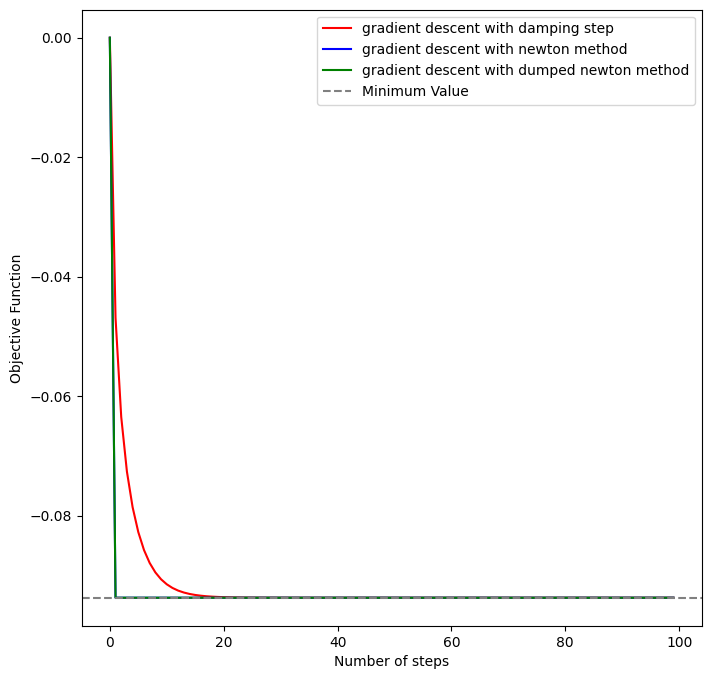

In [43]:
# Draw the objective function's value changes with the steps
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
plt.plot(range(len(damping_objectives)), damping_objectives,'r', label='gradient descent with damping step')
plt.plot(range(len(newton_objectives)), newton_objectives,'b', label='gradient descent with newton method')
plt.plot(range(len(damped_newton_objectives)), damped_newton_objectives,'g', label='gradient descent with dumped newton method')
plt.axhline(y=y_best, color='grey', linestyle='--', label='Minimum Value')
plt.legend(loc='upper right')
plt.show()

In [44]:
# Variation of optimization results with other variables when fixing one parameter.

# Attention: The calculations here are very resource-intensive, so please don't over-parameter them!
from ipywidgets import interact
import matplotlib.pyplot as plt

# Choose the maximum number and minimun number of X

MAX_INIT_X_1 = 6.0
MIN_INIT_X_1 = -6.0
MAX_INIT_X_2 = 6.0
MIN_INIT_X_2 = -6.0
MAX_INIT_X_3 = 6.0
MIN_INIT_X_3 = -6.0

# Describe the plotting accuracy
num_intervals = 5
ITER = 30


def draw_counter_plot(fix, fixed_number, method):
    x_1 = np.linspace(MAX_INIT_X_1, MIN_INIT_X_1, num_intervals)
    x_2 = np.linspace(MAX_INIT_X_2, MIN_INIT_X_2, num_intervals)
    x_3 = np.linspace(MAX_INIT_X_3, MIN_INIT_X_3, num_intervals)

    x_left_name = ''
    x_right_name = ''
    x_left = np.array([])
    x_right = np.array([])
    Y = np.zeros(num_intervals)
    iter = ITER
    # Calculate the result.

    def calculate_finial_value(x_left, x_right, x_fixed, gd):
        for xl_row, xr_row in zip(x_left, x_right):
            temp = []
            for xl, xr in zip(xl_row, xr_row):
                t1, t2 = gd(x_fixed)(xl)(xr)
                temp.append(t1[-1])
            yield temp
    # Fix variables by parameters.

    match method:
        case 'damping step':
            optim_method = damping_step_generator()
        case 'newton method':
            optim_method = newton_method
        case 'dumped newton method':
            optim_method = damped_newton_method_generator()

    match fix:
        case 'x_1':
            x_left_name = 'x[2]'
            x_right_name = 'x[3]'
            x_left, x_right = np.meshgrid(x_2, x_3)
            x_fixed = fixed_number
            # Calculate the result.

            def gd1(x1): return lambda x2: lambda x3: gradient_descent(
                np.array([x1, x2, x3]), iter, objective_function, optim_method, is_log=False)
            Y = np.array([item for item in calculate_finial_value(
                x_left, x_right, x_fixed, gd1)])
        case 'x_2':
            x_left_name = 'x[3]'
            x_right_name = 'x[1]'
            x_left, x_right = np.meshgrid(x_3, x_1)
            x_fixed = fixed_number
            # Calculate the result.

            def gd2(x1): return lambda x2: lambda x3: gradient_descent(
                np.array([x3, x1, x2]), iter, objective_function, optim_method, is_log=False)
            Y = np.array([item for item in calculate_finial_value(
                x_left, x_right, x_fixed, gd2)])
        case 'x_3':
            x_left_name = 'x[1]'
            x_right_name = 'x[2]'
            x_left, x_right = np.meshgrid(x_1, x_2)
            x_fixed = fixed_number
            # Calculate the result.

            def gd3(x1): return lambda x2: lambda x3: gradient_descent(
                np.array([x2, x3, x1]), iter, objective_function, optim_method, is_log=False)
            Y = np.array([item for item in calculate_finial_value(
                x_left, x_right, x_fixed, gd3)])

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Draw the contour plot.
    ax.plot_surface(x_left, x_right, Y, cmap='viridis',
                    edgecolor='none', alpha=0.8)

    # Set the title and label.
    ax.set_xlabel(f'{x_left_name}')
    ax.set_ylabel(f'{x_right_name}')
    ax.set_title(
        f'3D Contour Plot of finial value with fixed {fix} by {method}')

    # Show the contour plot.
    plt.show()


# Creating an Interactive Interface.
interact(draw_counter_plot, fix=['x_1', 'x_2', 'x_3'], fixed_number=(
    MIN_X_1, MAX_X_1), method=['damping step', 'newton method', 'dumped newton method'])

interactive(children=(Dropdown(description='fix', options=('x_1', 'x_2', 'x_3'), value='x_1'), FloatSlider(val…

<function __main__.draw_counter_plot(fix, fixed_number, method)>